In [ ]:
import math
import random
import numpy as np
import copy
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [ ]:
c1 = np.loadtxt('/content/drive/MyDrive/Spring2023/CS4140/C1.txt', dtype = float)
c2 = np.loadtxt('/content/drive/MyDrive/Spring2023/CS4140/C2.txt', dtype = float)
c3 = np.loadtxt('/content/drive/MyDrive/Spring2023/CS4140/C3.txt', dtype = float)

In [ ]:
c2

In [ ]:
c1_lst = []
for i in c1:
  c1_lst.append([i])
c1_lst[0]
c1_lst2 = copy.deepcopy(c1_lst)

In [ ]:
c1_lst2_filtered = [] 
for c in c1_lst2:
  c1_lst2_filtered.append([c[0][1], c[0][2]])
c1_lst2_filtered 

[[-0.75, 2.23129],
 [-0.77, 1.7523932],
 [-0.2, -1.51712],
 [-0.12, -1.38923],
 [0.5, 0.123],
 [0.7234, 0.125],
 [0.9, 0.2],
 [-1.0, 0.4],
 [-0.8461538, 0.2630405],
 [-0.6923077, 0.1173418],
 [-0.5384615, -0.031634],
 [-0.3846154, -0.1784251],
 [-0.2307692, -0.3175694],
 [-0.0769231, -0.4436049],
 [0.0769231, -0.5510696],
 [0.2307692, -0.6345016],
 [0.3846154, -0.6884388],
 [0.5384615, -0.7074192],
 [0.6923077, -0.6859809],
 [0.8461538, -0.6186618],
 [1.0, -0.5]]

array([[-2.7694973, -2.7694973],
       [-2.7039693, -2.7039693],
       [-2.4496287, -2.4496287],
       ...,
       [-0.9127945, -0.9127945],
       [-1.6710883, -1.6710883],
       [-2.       , -2.       ]])

In [ ]:
r = np.arange(0,len(c1))
comb = list(combinations(r, 2))

In [ ]:
def complete_link(s1, s2):
  complete_link_comp = -math.inf

  for i in s1:
    for j in s2:
      complete_link_comp = max(np.sqrt((i[1]-j[1])**2+(i[2]-j[2])**2), complete_link_comp)

  return complete_link_comp

In [ ]:
def single_link(s1, s2):
  single_link_comp = math.inf

  for i in s1:
    for j in s2:
      single_link_comp = min(np.sqrt((i[1]-j[1])**2+(i[2]-j[2])**2), single_link_comp)

  return single_link_comp

In [ ]:
c1_lst2

In [ ]:
while len(c1_lst2) > 3:
  s_matrix = np.ones((len(c1_lst2), len(c1_lst2)))
  for i in range(len(c1_lst2)):
    for j in range(i+1,len(c1_lst2)):
      s_matrix[i,j] = complete_link(c1_lst2[i], c1_lst2[j])
  min_dist_idx = np.where(s_matrix == np.min(s_matrix))
  c1_lst2[min_dist_idx[0][0]].extend(c1_lst2[min_dist_idx[1][0]])
  c1_lst2 = np.delete(c1_lst2, min_dist_idx[1][0])

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
c1_lst2

[array([ 8. , -1. ,  0.4]), array([ 9.       , -0.8461538,  0.2630405]), array([10.       , -0.6923077,  0.1173418])]
[array([11.       , -0.5384615, -0.031634 ]), array([12.       , -0.3846154, -0.1784251]), array([13.       , -0.2307692, -0.3175694]), array([14.       , -0.0769231, -0.4436049])]
[array([15.       ,  0.0769231, -0.5510696]), array([16.       ,  0.2307692, -0.6345016]), array([17.       ,  0.3846154, -0.6884388]), array([18.       ,  0.5384615, -0.7074192])]


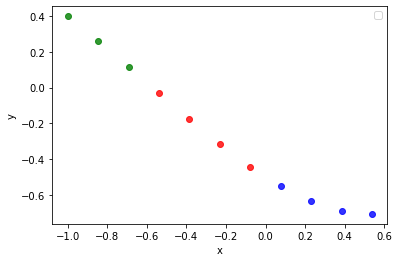

In [ ]:
colors = ["green", "red", "blue"]
fig = plt.figure()
ax = fig.add_subplot()
for data, color in zip(c1_lst2, colors):
    print(data)
    for dot in data:
      x,y = dot[1],dot[2]
      ax.scatter(x, y, alpha=0.8, c=color)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

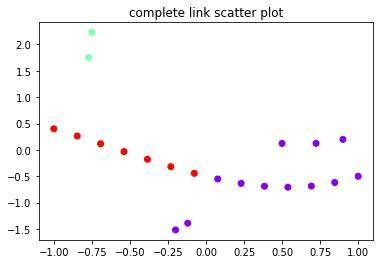

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo_cluster_2 = AgglomerativeClustering(n_clusters=3, linkage='complete')
agglo_cluster_2.fit_predict(c1_lst2_filtered)
plt.figure()
plt.scatter(np.array(c1_lst2_filtered)[:,0], np.array(c1_lst2_filtered)[:,1], c=agglo_cluster_2.labels_, cmap='rainbow' )
plt.title('complete link scatter plot')
plt.show()

In [ ]:
while len(c1_lst) > 3:
  s_matrix = np.ones((len(c1_lst), len(c1_lst)))
  for i in range(len(c1_lst)):
    for j in range(i+1,len(c1_lst)):
      s_matrix[i,j] = single_link(c1_lst[i], c1_lst[j])
  min_dist_idx = np.where(s_matrix == np.min(s_matrix))
  c1_lst[min_dist_idx[0][0]].extend(c1_lst[min_dist_idx[1][0]])
  c1_lst = np.delete(c1_lst, min_dist_idx[1][0])

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


[array([ 1.     , -0.75   ,  2.23129]), array([ 2.       , -0.77     ,  1.7523932])]
[array([ 3.     , -0.2    , -1.51712]), array([ 4.     , -0.12   , -1.38923])]
[array([5.   , 0.5  , 0.123]), array([6.    , 0.7234, 0.125 ]), array([7. , 0.9, 0.2]), array([ 8. , -1. ,  0.4]), array([ 9.       , -0.8461538,  0.2630405]), array([10.       , -0.6923077,  0.1173418]), array([11.       , -0.5384615, -0.031634 ]), array([12.       , -0.3846154, -0.1784251]), array([13.       , -0.2307692, -0.3175694]), array([14.       , -0.0769231, -0.4436049]), array([15.       ,  0.0769231, -0.5510696]), array([16.       ,  0.2307692, -0.6345016]), array([17.       ,  0.3846154, -0.6884388]), array([18.       ,  0.5384615, -0.7074192]), array([19.       ,  0.6923077, -0.6859809]), array([20.       ,  0.8461538, -0.6186618]), array([21. ,  1. , -0.5])]


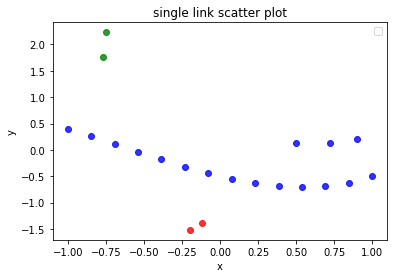

In [ ]:
colors = ["green", "red", "blue"]

fig = plt.figure()
ax = fig.add_subplot()
for data, color in zip(c1_lst, colors):
    print(data)
    for dot in data:
      x,y = dot[1],dot[2]
      ax.scatter(x, y, alpha=0.8, c=color)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('single link scatter plot')
plt.show()
# [array([ 1.     , -0.75   ,  2.23129]), array([ 2.       , -0.77     ,  1.7523932])]
# [array([ 3.     , -0.2    , -1.51712]), array([ 4.     , -0.12   , -1.38923])]
# [array([5.   , 0.5  , 0.123]), array([6.    , 0.7234, 0.125 ]), array([7. , 0.9, 0.2]), array([ 8. , -1. ,  0.4]), array([ 9.       , -0.8461538,  0.2630405]), array([10.       , -0.6923077,  0.1173418]), array([11.       , -0.5384615, -0.031634 ]), array([12.       , -0.3846154, -0.1784251]), array([13.       , -0.2307692, -0.3175694]), array([14.       , -0.0769231, -0.4436049]), array([15.       ,  0.0769231, -0.5510696]), array([16.       ,  0.2307692, -0.6345016]), array([17.       ,  0.3846154, -0.6884388]), array([18.       ,  0.5384615, -0.7074192]), array([19.       ,  0.6923077, -0.6859809]), array([20.       ,  0.8461538, -0.6186618]), array([21. ,  1. , -0.5])]

i 1029
i 1001
i 343
is {1, 1001, 1029, 343}
4-center cost: 3.481123664686921
4-mean cost: 1.600536590805209
[array([-2.7694973,  2.6778586]), array([-2., 14.]), array([-0.4032861, -5.4479696]), array([4.6102579, 0.6921337])]


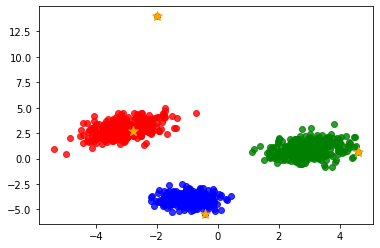

In [ ]:
c2_lst = []
for i in c2:
  c2_lst.append([i[1], i[2]])
data = np.array(c2_lst)
centers = [data[0]]

i = 0
phi = np.zeros(len(data))
index_set = set([1])

while i < 3: # i = 0 | phi = np.zeros(len(data)) | index_set = set([1])

  max_dist = 0
  for j in range(len(data)):
      x = int(phi[j])
      #print(centers[x][0])
      dist = np.sqrt((centers[x][0]-data[j][0])**2+(centers[x][1]-data[j][1])**2)
      if dist > max_dist:
          max_dist = dist
          center = data[j]
          index = j+1
  i += 1
  index_set.add(index)
  centers.append(center)

  for k in range(len(data)):
      x = int(phi[k])
      dist_x = np.sqrt((centers[x][0] - data[k][0]) ** 2 + (centers[x][1] - data[k][1]) ** 2)
      dist_i = np.sqrt((centers[i][0] - data[k][0]) ** 2 + (centers[i][1] - data[k][1]) ** 2)
      if (dist_x > dist_i):
          phi[k] = i
clusters = [[],[],[],[]]
center_cost = 0
mean_cost = 0

for i in range(len(data)):
    x = int(phi[i])
    clusters[x].append(data[i])
    dist = np.sqrt((centers[x][0] - data[i][0]) ** 2 + (centers[x][1] - data[i][1]) ** 2)
    mean_cost += dist**2/len(data)
    if dist > center_cost:
        center_cost = dist

mean_cost = np.sqrt(mean_cost)
np.savetxt("GoneIndex.txt", phi)
print("4-center cost: "+str(center_cost))
print("4-mean cost: "+str(mean_cost))
print(centers)


colors = ["red", "brown", "blue", "green"]

fig = plt.figure()
ax = fig.add_subplot()
for data, color in zip(clusters, colors):
    #print(data)
    for dot in data:
        x,y = dot
       # print(x,y)
        ax.scatter(x, y, alpha=0.8, c=color)

ax.scatter(np.array(centers)[:,0], np.array(centers)[:,1], s=100, marker='*',c="orange")

plt.show()
# centroid = {1, 1001, 1029, 343}
# cluster = [array([-2.7694973,  2.6778586]), array([-2., 14.]), array([-0.4032861, -5.4479696]), array([4.6102579, 0.6921337])]
# 4-center cost: 3.481123664686921
# 4-mean cost: 1.600536590805209

In [ ]:
c3_lst = []
for i in c3:
  c3_lst.append([i[1], i[2], i[3], i[4], i[5]])
data = np.array(c3_lst)
data

array([[ 1.0578144,  0.0568892, -0.1392866,  0.0674745, -0.07317  ],
       [ 1.0255134,  0.2587759,  0.0507179, -0.1396585,  0.0045476],
       [ 0.9816412,  0.1065561, -0.0604434, -0.0472573,  0.1929483],
       ...,
       [ 0.9521999,  2.0844574,  0.0530692,  0.0721139,  0.9859486],
       [ 0.9719369,  2.0754205, -0.0310972, -0.0453573,  1.0402399],
       [ 0.8912047,  2.0552269, -0.0884621, -0.1595513,  0.9784692]])

[[1.0578144, 0.0568892, -0.1392866, 0.0674745, -0.07317],
 [1.0255134, 0.2587759, 0.0507179, -0.1396585, 0.0045476],
 [0.9816412, 0.1065561, -0.0604434, -0.0472573, 0.1929483],
 [0.9634015, -0.2439366, -0.1054767, -0.1222237, -0.1736821],
 [1.0194926, -0.1073145, -0.2288718, -0.0376305, 0.0697215]]

In [ ]:
centers = [data[0], data[1], data[2], data[3], data[4]]
print("c", centers)
#centers = [data[0], data[1039], data[646]]
centerCost = []
meanCost = []
iter = 0
while iter < 100:

    cluster1 = []
    cluster2 = []
    cluster3 = []
    cluster4 = []
    phi = np.zeros(len(data))
    for i in range(len(data)):
        dist1 = np.sqrt((centers[0][0] - data[i][0]) ** 2 + (centers[0][1] - data[i][1]) ** 2)
        dist2 = np.sqrt((centers[1][0] - data[i][0]) ** 2 + (centers[1][1] - data[i][1]) ** 2)
        dist3 = np.sqrt((centers[2][0] - data[i][0]) ** 2 + (centers[2][1] - data[i][1]) ** 2)
        dist4 = np.sqrt((centers[3][0] - data[i][0]) ** 2 + (centers[3][1] - data[i][1]) ** 2)
        min_dist = min(dist1,dist2,dist3,dist4)
        if min_dist == dist1:
            phi[i] = 0
            cluster1.append(data[i])
        elif min_dist == dist2:
            phi[i] = 1
            cluster2.append(data[i])
        elif min_dist == dist3:
            phi[i] = 2
            cluster3.append(data[i])
        elif min_dist == dist4:
            phi[i] = 3
            cluster4.append(data[i])

    centers[0] = np.mean(cluster1, axis=0)
    centers[1] = np.mean(cluster2, axis=0)
    centers[2] = np.mean(cluster3, axis=0)
    centers[3] = np.mean(cluster4, axis=0)
    print("phi",phi)
    # print(centers)
    iter += 1



clusters = [cluster1,cluster2,cluster3,cluster4]

meanCost = 0
for i in range(len(clusters)):

    center = centers[i]
    for j in range(len(clusters[i])):
        dot = clusters[i][j]
        meanCost += ((dot[0]-center[0])**2 + (dot[1]-center[1])**2)/len(data)

meanCost = np.sqrt(meanCost)
print()
print("The 4-mean cost of Lloyd's k-means clustering: " + str(meanCost))

colors = ["green", "red", "blue", "cyan"]

fig = plt.figure()
ax = fig.add_subplot()
for data, color in zip(clusters, colors):
    print(data)
    for dot in data:
        x,y = dot
       # print(x,y)
        ax.scatter(x, y, alpha=0.8, c=color)

#plt.title("Lloyd's k-means clustering with Gonzalez initialized")
plt.show()

The standard deviation of center cost: 1.9384115493657765
The standard deviation of mean cost: 0.11788793965421729
The fraction of subsets similar to Gonzalez: 0.06


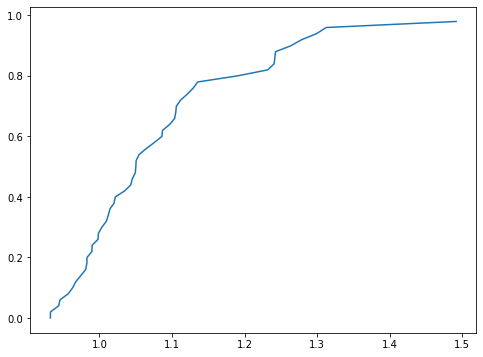

In [ ]:
file = open('/content/drive/MyDrive/Spring2023/CS4140/C2.txt',"r")
lines = file.readlines()
data = []

for line in lines:
    data.append([float(line.split()[1]),float(line.split()[2])])
data = np.array(data)
centerCost = np.zeros(50)
meanCost = np.zeros(50)
allCenters = []
Gonzalez_phi = np.loadtxt('GoneIndex.txt')
Gindex1 = np.where(Gonzalez_phi == 0)
Gindex2 = np.where(Gonzalez_phi == 1)
Gindex3 = np.where(Gonzalez_phi == 2)
Gindex4 = np.where(Gonzalez_phi == 3)
Gindex_sum = set([np.sum(Gindex1), np.sum(Gindex2), np.sum(Gindex3), np.sum(Gindex4)])
print(Gindex1)
count = 0
center_lst=[]

for iter in range(50):
    #x = np.random.randint(len(data))

    centers = [data[0]]

    i = 0
    phi = np.zeros(len(data))
    #index_set = set([1])


    while i < 3:
        #max_dist = 0
        prob_distribution = []
        for j in range(len(data)):
            x = int(phi[j])
            #print(centers[x][0])
            dist = (centers[x][0]-data[j][0])**2+(centers[x][1]-data[j][1])**2
            prob_distribution.append(dist)

        prob_distribution = np.array(prob_distribution) / np.sum(prob_distribution)
        centers.append(data[np.random.choice(range(len(data)), p=prob_distribution)])
        
        i += 1

        for k in range(len(data)):
            x = int(phi[k])
            dist_x = np.sqrt((centers[x][0] - data[k][0]) ** 2 + (centers[x][1] - data[k][1]) ** 2)
            dist_i = np.sqrt((centers[i][0] - data[k][0]) ** 2 + (centers[i][1] - data[k][1]) ** 2)
            if (dist_x > dist_i):
                phi[k] = i
    #print(centers)
    center_lst.append(centers)
    clusters = [[],[],[],[]]
    center_cost = 0
    mean_cost = 0
    for i in range(len(data)):
        x = int(phi[i])
        clusters[x].append(data[i])
        dist = np.sqrt((centers[x][0] - data[i][0]) ** 2 + (centers[x][1] - data[i][1]) ** 2)
        mean_cost += dist**2/len(data)
        if dist > center_cost:
            center_cost = dist

    mean_cost = np.sqrt(mean_cost)

    centerCost[iter] = center_cost
    meanCost[iter] = mean_cost
    #print(phi)
    #if np.sum(phi) == np.sum(Gonzalez_phi):
    index1 = np.where(phi == 0)
    index2 = np.where(phi == 1)
    index3 = np.where(phi == 2)
    index4 = np.where(phi == 3)
    index_sum = set([np.sum(index1), np.sum(index2), np.sum(index3), np.sum(index4)])
    #print(index_sum)
    if index_sum == Gindex_sum:
        #print(index_sum,Gindex_sum)
        #print(phi)
        count += 1

print("The standard deviation of center cost: "+ str(np.std(centerCost)))
print("The standard deviation of mean cost: " + str(np.std(meanCost)))
print("The fraction of subsets similar to Gonzalez: "+str(count/len(meanCost)))
#print(len(meanCost))
fig, ax = plt.subplots(figsize=(8, 6))
# n, bins, patches = ax.hist(meanCost, 100, density=True, histtype='step', cumulative=True)
x = np.asarray(sorted(meanCost))
y = np.arange(len(meanCost))/float(len(meanCost))
plt.plot(x,y)
plt.show()
# The standard deviation of center cost: 2.725887784911488
# The standard deviation of mean cost: 0.10766825889070293
# The fraction of subsets similar to Gonzalez: 0.14 2bii
# 2c(i) The fraction of subsets similar to 4-means cost from Lloyds Algorithm with C initially with points indexed {1,2,3,4}: 0.8541578144032685 
# 2c(ii) The fraction of subsets similar to 4-means cost from Lloyds Algorithm with C initially as the output of Gonzalez above: 0.8775919061122385 
0.8775919061122385

1029
1001
343
{1, 1001, 1029, 343}
4-center cost: 3.481123664686921
4-mean cost: 1.600536590805209
[array([-2.7694973,  2.6778586]), array([-2., 14.]), array([-0.4032861, -5.4479696]), array([4.6102579, 0.6921337])]


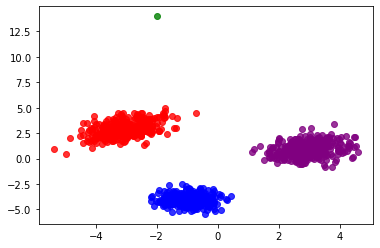

In [ ]:
file = open('/content/drive/MyDrive/Spring2023/CS4140/C2.txt',"r")
lines = file.readlines()
data = []

for line in lines:
    data.append([float(line.split()[1]),float(line.split()[2])])
data = np.array(data)
data
centers = [data[0]]

i = 0
phi = np.zeros(len(data))
index_set = set([1])

while i < 3:

  max_dist = 0
  for j in range(len(data)):
      x = int(phi[j])
      #print(centers[x][0])
      dist = np.sqrt((centers[x][0]-data[j][0])**2+(centers[x][1]-data[j][1])**2)
      if dist > max_dist:
          max_dist = dist
          center = data[j]
          index = j+1
  i += 1
  print(index)
  index_set.add(index)
  centers.append(center)

  for k in range(len(data)):
      x = int(phi[k])
      dist_x = np.sqrt((centers[x][0] - data[k][0]) ** 2 + (centers[x][1] - data[k][1]) ** 2)
      dist_i = np.sqrt((centers[i][0] - data[k][0]) ** 2 + (centers[i][1] - data[k][1]) ** 2)
      if (dist_x > dist_i):
          phi[k] = i
print(index_set)
clusters = [[],[],[],[]]
center_cost = 0
mean_cost = 0

for i in range(len(data)):
    x = int(phi[i])
    clusters[x].append(data[i])
    dist = np.sqrt((centers[x][0] - data[i][0]) ** 2 + (centers[x][1] - data[i][1]) ** 2)
    mean_cost += dist**2/len(data)
    if dist > center_cost:
        center_cost = dist

mean_cost = np.sqrt(mean_cost)
np.savetxt("GoneIndex.txt", phi)
print("4-center cost: "+str(center_cost))
print("4-mean cost: "+str(mean_cost))
print(centers)


colors = ["red", "green", "blue", "purple"]

fig = plt.figure()
ax = fig.add_subplot()
for data, color in zip(clusters, colors):
    #print(data)
    for dot in data:
        x,y = dot
       # print(x,y)
        ax.scatter(x, y, alpha=0.8, c=color)

plt.show()
# centroids = {1, 1001, 1029, 343}
# 4-center cost: 3.481123664686921
# 4-mean cost: 1.600536590805209
# [array([-2.7694973,  2.6778586]), array([-2., 14.]), array([-0.4032861, -5.4479696]), array([4.6102579, 0.6921337])]

In [ ]:
center_lst

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


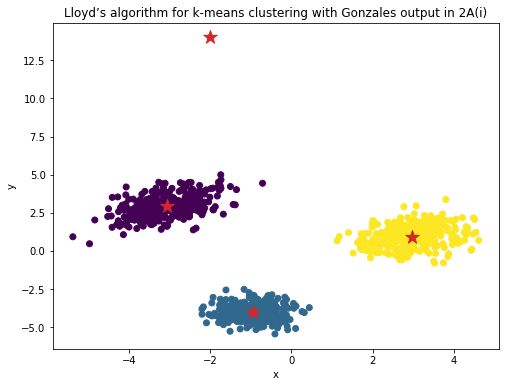

In [ ]:
# centroid = {1, 1001, 1029, 343}
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate some sample data
# np.random.seed(0)
# X = np.random.randn(100, 2)

file = open('/content/drive/MyDrive/Spring2023/CS4140/C2.txt',"r")
lines = file.readlines()
data = []

for line in lines:
    data.append([float(line.split()[1]),float(line.split()[2])])
data = np.array(data)

# Initialize the KMeans algorithm with the "random" initialization method and the initial centroid values
init_centroids = np.array([data[0], data[1000], data[1028], data[342]])
kmeans = KMeans(n_clusters=4, init=init_centroids, algorithm='auto', random_state=0)

# Fit the KMeans algorithm to the data
kmeans.fit(data)

# Get the cluster labels and centroids for each data point
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and cluster centroids
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data[:, 0], data[:, 1], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#d62728')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Lloyd’s algorithm for k-means clustering with Gonzales output in 2A(i)')
plt.show()

In [ ]:
center_lst

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate some sample data
# np.random.seed(0)
# X = np.random.randn(100, 2)

file = open('/content/drive/MyDrive/Spring2023/CS4140/C2.txt',"r")
lines = file.readlines()
data = []

for line in lines:
    data.append([float(line.split()[1]),float(line.split()[2])])
data = np.array(data)
print(data)

# Initialize the KMeans algorithm with the "random" initialization method and the initial centroid values
init_centroids = np.array(center_lst)
kmeans = KMeans(n_clusters=4, init=init_centroids, algorithm='auto', random_state=0)

# Fit the KMeans algorithm to the data
kmeans.fit(data)

# Get the cluster labels and centroids for each data point
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and cluster centroids
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data[:, 0], data[:, 1], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#d62728')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Lloyd’s algorithm for k-means clustering with each run of k-means++ in 2b(i)')
plt.show()

[[-2.7694973  2.6778586]
 [-2.7039693  2.5350218]
 [-2.4496287  3.7726618]
 ...
 [-0.9127945 -4.1640719]
 [-1.6710883 -4.8366017]
 [-2.        14.       ]]


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


ValueError: ignored

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


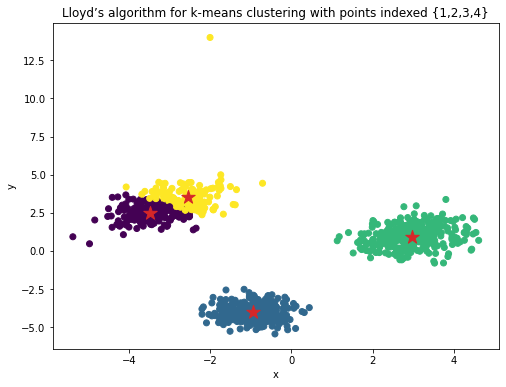

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate some sample data
# np.random.seed(0)
# X = np.random.randn(100, 2)

file = open('/content/drive/MyDrive/Spring2023/CS4140/C2.txt',"r")
lines = file.readlines()
data = []

for line in lines:
    data.append([float(line.split()[1]),float(line.split()[2])])
data = np.array(data)

# Initialize the KMeans algorithm with the "random" initialization method and the initial centroid values
init_centroids = np.array([data[0], data[1], data[2], data[3]])
kmeans = KMeans(n_clusters=4, init=init_centroids, algorithm='auto', random_state=0)

# Fit the KMeans algorithm to the data
kmeans.fit(data)

# Get the cluster labels and centroids for each data point
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and cluster centroids
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data[:, 0], data[:, 1], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#d62728')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Lloyd’s algorithm for k-means clustering with points indexed {1,2,3,4}')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your dataset and preprocess it as needed
c2_lst = []
for i in c2:
  c2_lst.append(i[1:])
X = np.array(c2_lst)

print(X[0])

# Choose the number of clusters k=4
k = 4

# Initialize the centroids using k-means++
kmeans = KMeans(n_clusters=k, init='k-means++', algorithm='lloyd')

# Compute the 4-means cost and center cost for multiple trials
n_trials = 20
costs = np.zeros(n_trials)
center_costs = np.zeros(n_trials)
for i in range(n_trials):
    # Run k-means++ with a different random seed each time
    kmeans.fit(X)
    
    # Compute the 4-means cost
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    dists = np.sum((X[i] - centroids[labels])**2, axis=1)
    cost = np.sum(dists)
    costs[i] = cost
    
    # Compute the center cost
    center = np.mean(centroids, axis=0)
    center_dists = np.sum((centroids - center)**2, axis=1)
    center_cost = np.sum(center_dists)
    center_costs[i] = center_cost

# Compute the mean and standard deviation of the costs across the trials
mean_cost = np.mean(costs)
std_cost = np.std(costs)
mean_center_cost = np.mean(center_costs)
std_center_cost = np.std(center_costs)
print('4-means cost: mean = {:.2f}, std = {:.2f}'.format(mean_cost, std_cost))
print('Center cost: mean = {:.2f}, std = {:.2f}'.format(mean_center_cost, std_center_cost))

# Sort the 4-means costs in ascending order
sorted_costs = np.sort(costs)

# Compute the empirical CDF of the 4-means costs
prob = np.arange(1, n_trials+1) / n_trials
empirical_cdf = np.cumsum(np.ones_like(sorted_costs)) / n_trials

# Plot the CDF
plt.plot(sorted_costs, empirical_cdf)
plt.xlabel('4-means cost')
plt.ylabel('Cumulative probability')
plt.show()

# 4-means cost: mean = 2068.17, std = 184.52
# Center cost: mean = 5.52, std = 0.18

[-2.7694973  2.6778586]


ValueError: ignored